# Generalised Forest Tuning - Figure 2

This is the code used to generate figure 2 of the paper "Generalising Random Forest Parameter Optimisation to Include Stability and Cost" by CHB Liu, BP Chamberlain, DA Little, A Cardoso (2017).

Please ensure you are using the anaconda environment `gft_env`. This is usually indicated by successfully importing the libraries below. If the library import resulted in any error, please try and run the `./setup_environment.sh` script again.

## Library imports

In [1]:
#import pandas as pd # You need pandas 0.19+
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from data_loader import *
#from evaluator import *
#from pybo import solve_bayesopt
#from functools import partial
import matplotlib.pyplot as plt

## Load Orange Small Dataset

We use the **upselling** labels here. The dataset is sliced in half for training (first half) and validation (second half).

In [2]:
orange_small_features, _, _, orange_small_upselling_labels = \
    get_and_process_orange_small_data()
    
orange_small_features_train, orange_small_features_val, \
orange_small_upselling_labels_train, orange_small_upselling_labels_val = \
    split_train_val_data(orange_small_features,
                         orange_small_upselling_labels,
                         prop=0.5)

## Distributional Plot of Prediction Deltas

- Training proportion: 1 (of all available training data - 1st half of the orange small training dataset)
- Number of trees: [8, 32, 128]
- Max. tree depth: 10
 
Note: Due to the random nature in random forest models, it may not be possible to exactly duplicate the distribution shown in the paper. Though the distribution should become more concentrated with increasing number of trees.

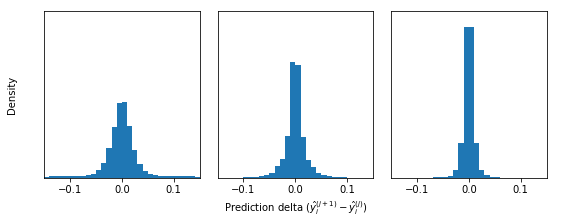

In [3]:
num_trees = [8, 32, 128]
num_runs = 11

# Reserve some space to store the predictions
pred = np.zeros(shape=(num_runs, orange_small_features_val.shape[0]))

# Initialise figure
fig = plt.figure(figsize=(8, 3.5))

# Set common labels on the large subplot
# Turn off axis lines and ticks of the big subplot
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off',
               left='off', right='off')
ax.set_xlabel('Prediction delta ($\hat{y}_i^{(j+1)} - \hat{y}_i^{(j)}$)')
ax.set_ylabel('Density')
    
for i in num_trees:
    
    RF = RandomForestClassifier(max_depth=10, n_estimators=i)
    
    # Compute prediction for all validation data points
    for j in range(0, num_runs):
        RF.fit(orange_small_features_train, 
               orange_small_upselling_labels_train)
        pred[j] = RF.predict_proba(orange_small_features_val)[:, 1]
        
    # Compute prediction deltas
    # Here we append the prediction deltas to get the "averaged out"
    # distribution on prediction deltas (this is different to plotting
    # the distribution of the average prediction deltas)
    pred_deltas = np.array([])
    for j in range(0, num_runs-1):
        pred_deltas = np.append(pred_deltas, pred[j+1] - pred[j])
    
    # Construct plot
    ax = fig.add_subplot(1, 3, num_trees.index(i) + 1)
    ax.hist(pred_deltas, bins=30, range=(-0.15, 0.15), normed=True)
    ax.set_xlim(-0.15, 0.15)
    ax.set_ylim(0, 42)
    ax.set_xticks([-0.1, 0, 0.1])
    ax.set_yticks([])
    
fig.tight_layout()

# Either save the figure or show on screen
# plt.savefig("../results/prediction_delta_distribution.pdf", 
#             bbox_inches='tight')
plt.show()